In [2]:
import pandas as pd
import pathlib
import os
import torch
import csv

In [ ]:
# r_tensor = torch.tensor([[2], [3], [4]]).to('cuda')
# new_tensor = torch.tensor([[9]]).to('cuda')
# new_tensor2 = torch.cat((r_tensor, new_tensor), dim=0)
# new_tensor2[3].item()

In [ ]:
# r_tensor = torch.tensor([]).to('cuda')
# new_tensor = torch.tensor([[9]]).to('cuda')
# new_tensor2 = torch.cat((r_tensor, new_tensor), dim=0)
# new_tensor2 = torch.cat((new_tensor2, new_tensor), dim=0)
# print(new_tensor2[1])

In [3]:
directory = os.path.abspath('reward_monitors\old')

r_tensor = torch.tensor([]).to('cuda')
l_tensor = torch.tensor([]).to('cuda')
t_tensor = torch.tensor([]).to('cuda')

tensor_index = 0
for filename in os.listdir(directory):
    counter=0
    with open(directory+"\\"+filename) as csvfile:
        print(filename)
        reward_monitor = csv.reader(csvfile)
        for row in reward_monitor:
            if counter >= 2 and counter % 2 != 0:
                # grab the values from each file
                r = row[0]
                r_harvest = torch.tensor([float(r)]).to('cuda')
                l = row[1]
                l_harvest = torch.tensor([int(l)]).to('cuda')
                t = row[2]
                t_harvest = torch.tensor([float(t)]).to('cuda')
                # insert them into master tensors
                r_tensor = torch.cat((r_tensor, r_harvest), dim=0)
                l_tensor = torch.cat((l_tensor, l_harvest), dim=0)
                t_tensor = torch.cat((t_tensor, t_harvest), dim=0)
                

                tensor_index += 1
            counter += 1

print("job completed. Number of values: ", tensor_index)


reward_record.monitor_6_25_250m.csv
reward_record.monitor_6_30_250-292.csv
reward_record.monitor_7_1_290_322.csv
reward_record.monitor_7_1_322_370.csv
reward_record.monitor_7_2_370_450.csv
reward_record.monitor_7_4_450_542.csv
reward_record.monitor_7_5_542_745.csv
reward_record.monitor_7_7_745_930.csv
reward_record.monitor_7_8_930_1005.csv
job completed. Number of values:  2283534


In [30]:
r_harvest

tensor([45.3757], device='cuda:0')

In [7]:
unique_timesteps, timestep_counts = torch.unique_consecutive(input=t_tensor, return_counts=True)

tensor(17.9049, device='cuda:0')

In [33]:
start = 0

avgreward = torch.tensor([]).to('cuda')
cumavg = torch.tensor([]).to('cuda')

for count in timestep_counts:
    end = start + count.item()
    avgreward = torch.cat((avgreward, r_tensor[start:end].mean().unsqueeze(dim=0) ), dim=0)
    cumavg = torch.cat((cumavg, r_tensor[0:end].mean().unsqueeze(dim=0) ), dim=0)

    start = end



In [45]:
avgreward.size()

torch.Size([1155469])

In [46]:
import torchplot as plt

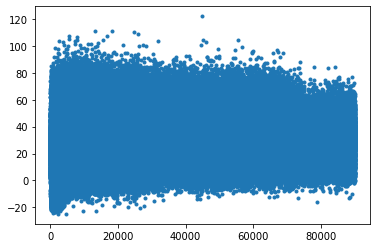

In [48]:
plt.plot(unique_timesteps, avgreward, ".")

In [51]:
cumavg.size()

torch.Size([1155469])

Text(0, 0.5, 'Average Cumulative Reward')

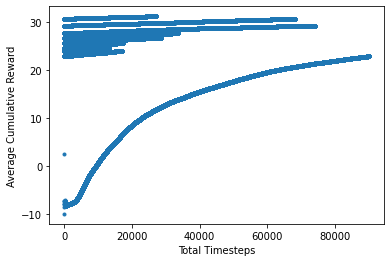

In [54]:
plt.plot(unique_timesteps, cumavg, ".")
plt.xlabel("Total Timesteps")
plt.ylabel("Average Cumulative Reward")

In [ ]:
reward_file = pd.read_csv("reward_record.monitor_NEW_CSV.csv")
reward_file.info()

In [ ]:
reward_file['avg_cumulative'] = reward_file['Rewards'].expanding().mean()
reward_file['total_timestep'] = reward_file['Timesteps'].expanding().sum()

In [ ]:
import seaborn as sns
ax = sns.scatterplot(data=reward_file, x='total_timestep', y='avg_cumulative', color='red')
ax.set(xlabel="Total Timesteps", ylabel = "Average Cumulative Reward")


In [ ]:
ax = sns.scatterplot(data=reward_file, x='total_timestep', y='Rewards')
ax.set(xlabel="Total Timesteps", ylabel = "Rewards Per Episode")